In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
results = pd.read_csv('../data/English_Language_Arts__ELA__Test_Results_2013-2023_20240501.csv')

In [6]:
results.sample(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
381038,School,21K153,P.S. 153 HOMECREST,3,2019,Black,1,s,s,s,s,s,s,s,s,s,s,s
241011,School,25Q129,P.S. 129 PATRICIA LARKIN,4,2019,Current ELL,28,587,9,32.1,12,42.9,7,25.0,0,0.0,7,25.0
329554,School,11X083,P.S. 083 DONALD HERTZ,8,2013,Hispanic,112,293,40,35.7,43,38.4,20,17.9,9,8.0,29,25.9
540865,School,31R861,STATEN ISLAND SCHOOL OF CIVIC LEADERSHIP,5,2015,Female,41,300,13,31.7,19,46.3,7,17.1,2,4.9,9,22.0
170069,School,03M180,P.S. 180 HUGO NEWMAN,4,2019,Ever ELL,1,s,s,s,s,s,s,s,s,s,s,s


In [7]:
results['Year'].unique

<bound method Series.unique of 0         2023
1         2023
2         2023
3         2023
4         2023
          ... 
626457    2014
626458    2013
626459    2013
626460    2013
626461    2013
Name: Year, Length: 626462, dtype: int64>

# Column Description 
- 'Report Category' - The high-level grouping for each report: Citywide,Borough,District,School
- 'Geographic Subdivision' - The individual schools or geographic subregion for each of the main categories  
- 'School Name' - Name of the school
- 'Grade' - School grade which test was administered: All Grades, 3-8 grades
- 'Year' - Year test was administered
- 'Student Category' - Reflects the set of students which were tested;
    - All Students 
    - SWD (Students with Disability): Not SWD, SWD
    - Ethnicity: Asian, Black, Hispanic, Multi-Racial, Native American, White
    - Gender: Female, Male, Neither Female nor Male
    - Gender by Ethnicity: F or M Asian, F or M Black, F or M Hispanic, F or M Multi-Racial, F or M Native American, F or M White
    - Econ Status (economic status): Econ Disadv, Not Econ Disadv
    - ELL (English Language Learner): Current ELL, Ever ELL, Never ELL
- 'Number Tested' - Total number of students tested 
- 'Mean Scale Score' - Average total students tested
- 'Num Level 1' - Number of students who scored in Level 1 range: 1 = Not Meeting Learning Standards
- 'Pct Level 1' - Percentage of students who scored in Level 1 range  
- 'Num Level 2' - Number of students who scored in Level 2 range: 2 = Partially Meeting Learning Standards
- 'Pct Level 2' - Percentage of students who scored in Level 2 range
- 'Num Level 3' - Number of students who scored in Level 3 range: 3 = Meeting Learning Standards
- 'Pct Level 3' - Percentage of students who scored in Level 3 range 
- 'Num Level 4' - Number of students who scored in Level 4 range: 4 = Meeting Learning Standards with Distinction  
- 'Pct Level 4' - Percentage of students who scored in Level 4 range
- 'Num Level 3 and 4' - Number of students who scored in Level 3 and 4 range combined: Level 3 and 4 combined
- 'Pct Level 3 and 4' - Percentage of students who scored in Level 3 and 4 range combined

In [8]:
results.columns

Index(['Report Category', 'Geographic Subdivision', 'School Name', 'Grade',
       'Year', 'Student Category', 'Number Tested', 'Mean Scale Score',
       'Num Level 1', 'Pct Level 1', 'Num Level 2', 'Pct Level 2',
       'Num Level 3', 'Pct Level 3', 'Num Level 4', 'Pct Level 4',
       'Num Level 3 and 4', 'Pct Level 3 and 4'],
      dtype='object')

In [9]:
# School with Highest Economic Need  - 12X211 - HEN
# School with Lowest Economic Need  - 02M183 - LEN

results[results['Geographic Subdivision'] == '12X211'].sample(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
490430,School,12X211,P.S. 211,4,2014,Male,15,278,9,60.0,3,20.0,2,13.3,1,6.7,3,20.0
490415,School,12X211,P.S. 211,4,2015,Female,27,285,10,37.0,14,51.9,2,7.4,1,3.7,3,11.1
203379,School,12X211,P.S. 211,5,2014,Ever ELL,1,s,s,s,s,s,s,s,s,s,s,s
338304,School,12X211,P.S. 211,All Grades,2013,Native American,1,s,s,s,s,s,s,s,s,s,s,s
111500,School,12X211,P.S. 211,7,2016,Not Econ Disadv,3,s,s,s,s,s,s,s,s,s,s,s


In [10]:
results[(results['Geographic Subdivision'] == '12X211') & 
        (results['Grade'] == 'All Grades') & 
        (results['Student Category'] == 'All Students')
        ].head(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
54444,School,12X211,P.S. 211,All Grades,2023,All Students,85,430,41,48.2,33,38.8,11,12.9,0,0.0,11,12.9
54451,School,12X211,P.S. 211,All Grades,2022,All Students,227,590,100,44.1,68,30.0,49,21.6,10,4.4,59,26.0
54458,School,12X211,P.S. 211,All Grades,2019,All Students,347,587,142,40.9,135,38.9,47,13.5,23,6.6,70,20.2
54465,School,12X211,P.S. 211,All Grades,2018,All Students,348,587,168,48.3,103,29.6,54,15.5,23,6.6,77,22.1
54472,School,12X211,P.S. 211,All Grades,2017,All Students,318,286,134,42.1,125,39.3,53,16.7,6,1.9,59,18.6


In [11]:
hen_results = results[
    (results['Geographic Subdivision'] == '12X211') & 
    (results['Grade'] == 'All Grades') & 
    (results['Student Category'] == 'All Students')
].copy()

hen_results.set_index('Year', inplace=True)

In [12]:
hen_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2023 to 2013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Report Category         9 non-null      object
 1   Geographic Subdivision  9 non-null      object
 2   School Name             9 non-null      object
 3   Grade                   9 non-null      object
 4   Student Category        9 non-null      object
 5   Number Tested           9 non-null      int64 
 6   Mean Scale Score        9 non-null      object
 7   Num Level 1             9 non-null      object
 8   Pct Level 1             9 non-null      object
 9   Num Level 2             9 non-null      object
 10  Pct Level 2             9 non-null      object
 11  Num Level 3             9 non-null      object
 12  Pct Level 3             9 non-null      object
 13  Num Level 4             9 non-null      object
 14  Pct Level 4             9 non-null      object
 15  Num Level

In [13]:
hen_results['Pct Level 4'].apply(type).unique()

array([<class 'str'>], dtype=object)

In [14]:
hen_results['Pct Level 4'] = pd.to_numeric(results['Pct Level 4'], errors='coerce')

In [15]:
hen_results['Pct Level 4'].apply(type).unique()

array([<class 'float'>], dtype=object)

In [16]:
hen_results['Pct Level 4'].describe()

count     9.000000
mean     11.822222
std       4.693553
min       4.600000
25%       6.800000
50%      13.300000
75%      15.300000
max      17.300000
Name: Pct Level 4, dtype: float64

In [17]:
# converting to float
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Num Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

hen_results[columns_to_convert] = hen_results[columns_to_convert].apply(pd.to_numeric, errors='coerce')

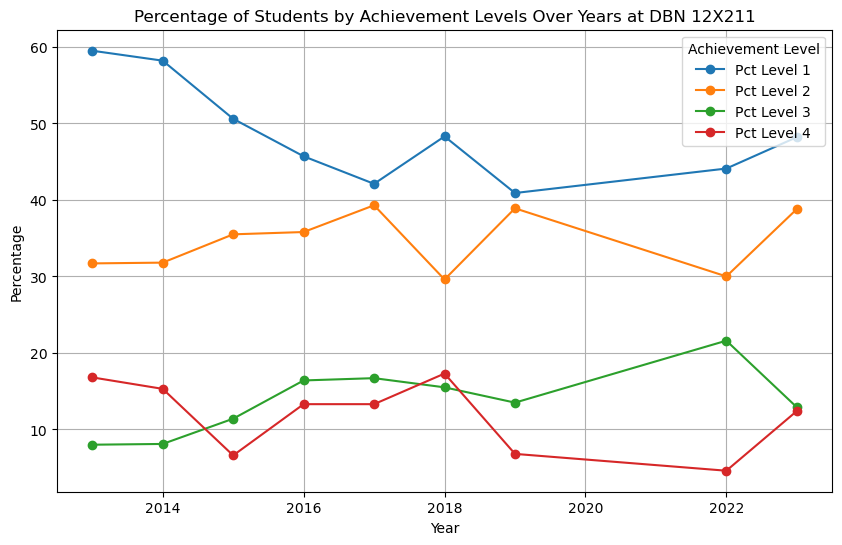

In [18]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(hen_results.index, hen_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(hen_results.index, hen_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(hen_results.index, hen_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(hen_results.index, hen_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Achievement Levels Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [19]:
# results['Year'] = pd.to_datetime(results['Year']).dt.year

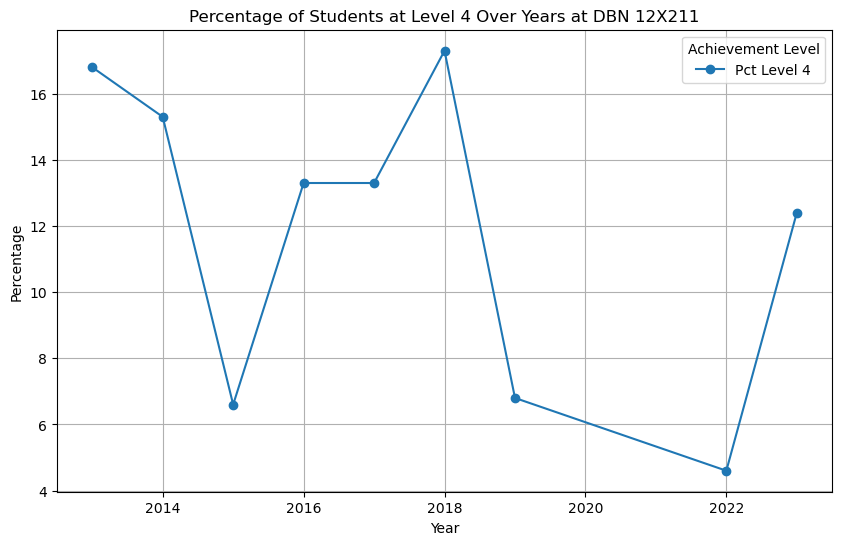

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(hen_results['Pct Level 4'], marker='o', linestyle='-', label='Pct Level 4')

plt.title('Percentage of Students at Level 4 Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

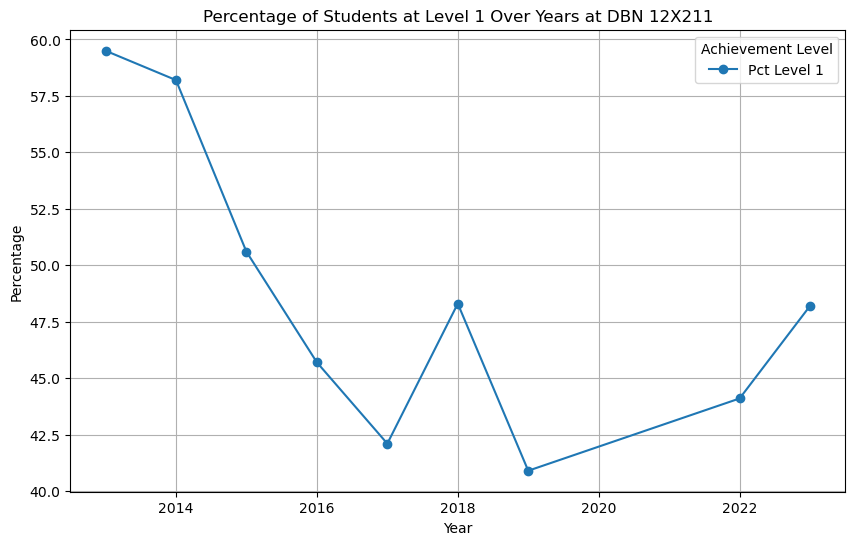

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(hen_results.index, hen_results['Pct Level 1'], marker='o', label='Pct Level 1')

plt.title('Percentage of Students at Level 1 Over Years at DBN 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [22]:
hen_results.index.unique()

Index([2023, 2022, 2019, 2018, 2017, 2016, 2015, 2014, 2013], dtype='int64', name='Year')

# important notes from dataset
- "Due to COVID-19 pandemic, the exams were not administered in 2020" and were optional for students to take in 2021
- in 2018, NYSED rescaled the Math and ELA exams to account for a change in test administration from 3 days to 2 days
- results from 2018 - 2022 can be compared to each other but cannot be compared to prior years (or to 2023)
- exams were cancelled in 2020 and voluntary in 2021 
- 21% of eligible students took the exam in 2021, no data for those years is included  


In [23]:
# School with Lowest Economic Need  - 02M183

results[(results['Geographic Subdivision'] == '02M183') & 
        (results['Grade'] == 'All Grades') & 
        (results['Student Category'] == 'All Students')
        ].head(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
40122,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2023,All Students,194,472,8,4.1,18,9.3,54,27.8,114,58.8,168,86.6
40126,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2022,All Students,202,620,8,4.0,17,8.4,78,38.6,99,49.0,177,87.6
40130,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2019,All Students,227,619,11,4.8,13,5.7,106,46.7,97,42.7,203,89.4
40134,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2018,All Students,233,621,4,1.7,26,11.2,87,37.3,116,49.8,203,87.1
40138,School,02M183,P.S. 183 ROBERT L. STEVENSON,All Grades,2017,All Students,224,341,11,4.9,29,12.9,90,40.2,94,42.0,184,82.1


In [24]:
len_results = results[
    (results['Geographic Subdivision'] == '02M183') & 
    (results['Grade'] == 'All Grades') & 
    (results['Student Category'] == 'All Students')
].copy()

len_results.set_index('Year', inplace=True)

In [25]:
len_results.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2023 to 2013
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Report Category         9 non-null      object
 1   Geographic Subdivision  9 non-null      object
 2   School Name             9 non-null      object
 3   Grade                   9 non-null      object
 4   Student Category        9 non-null      object
 5   Number Tested           9 non-null      int64 
 6   Mean Scale Score        9 non-null      object
 7   Num Level 1             9 non-null      object
 8   Pct Level 1             9 non-null      object
 9   Num Level 2             9 non-null      object
 10  Pct Level 2             9 non-null      object
 11  Num Level 3             9 non-null      object
 12  Pct Level 3             9 non-null      object
 13  Num Level 4             9 non-null      object
 14  Pct Level 4             9 non-null      object
 15  Num Level

In [26]:
# converting to float
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Num Level 4",
    "Pct Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

len_results[columns_to_convert] = len_results[columns_to_convert].apply(pd.to_numeric, errors='coerce')

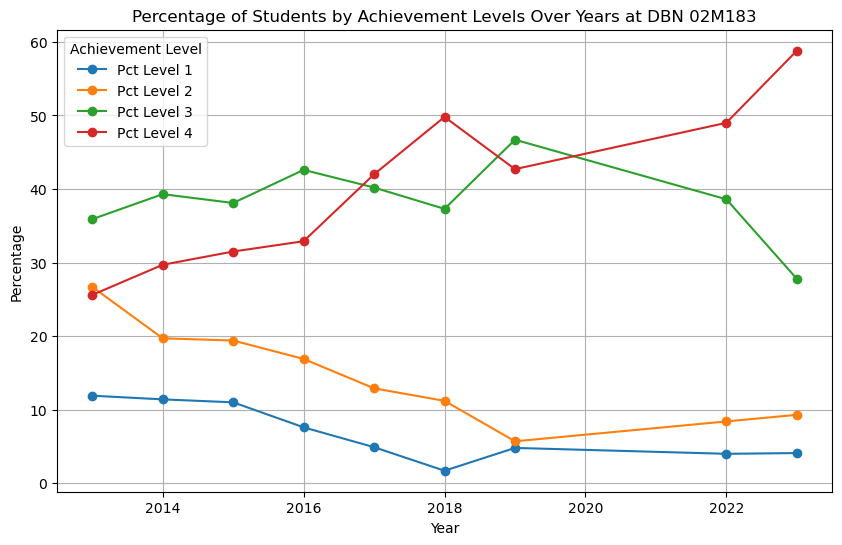

In [27]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(len_results.index, len_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(len_results.index, len_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(len_results.index, len_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Achievement Levels Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

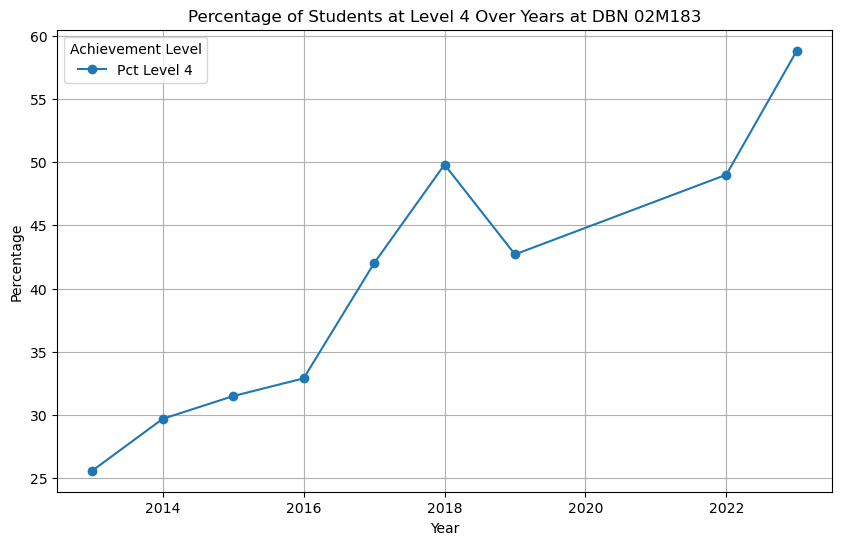

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(len_results['Pct Level 4'], marker='o', linestyle='-', label='Pct Level 4')

plt.title('Percentage of Students at Level 4 Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

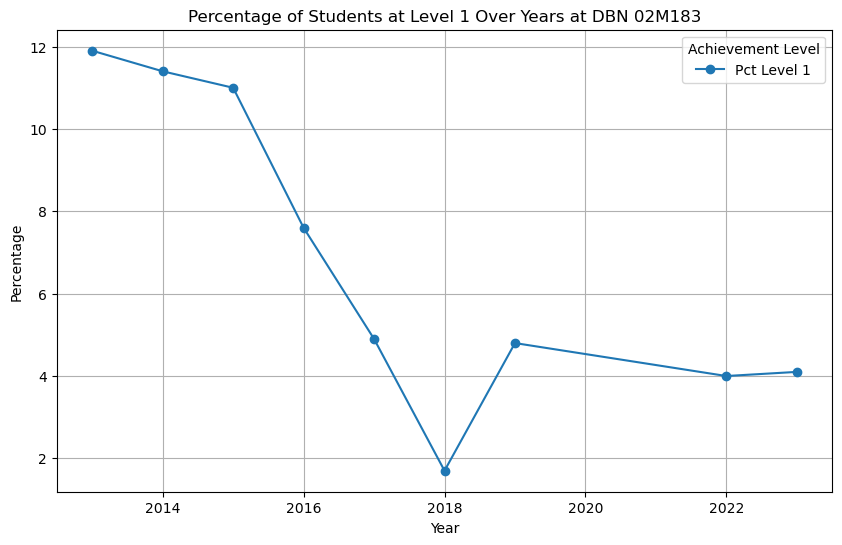

In [29]:
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 1'], marker='o', label='Pct Level 1')

plt.title('Percentage of Students at Level 1 Over Years at DBN 02M183')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [30]:
# School with Highest Economic Need Index - 12X211
# School with Lowest Economic Need  - 02M183

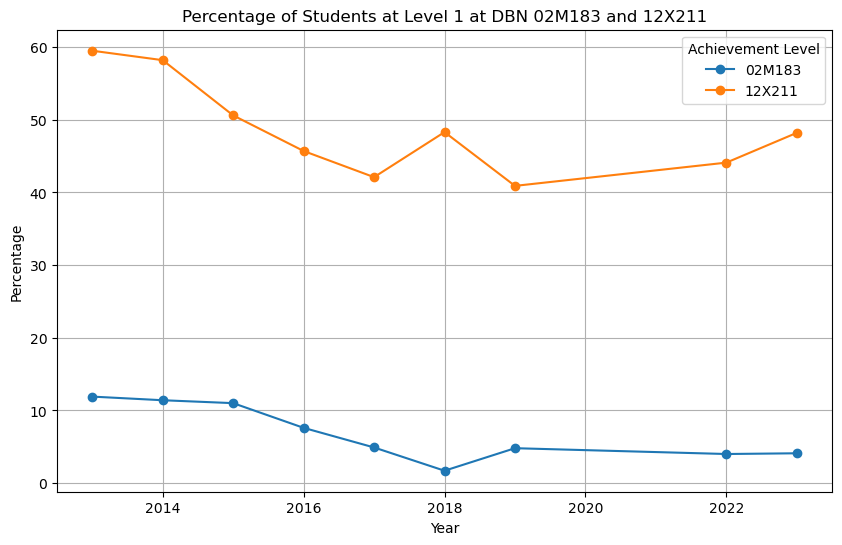

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 1'], marker='o', label='02M183')
plt.plot(len_results.index, hen_results['Pct Level 1'], marker='o', label='12X211')


plt.title('Percentage of Students at Level 1 at DBN 02M183 and 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

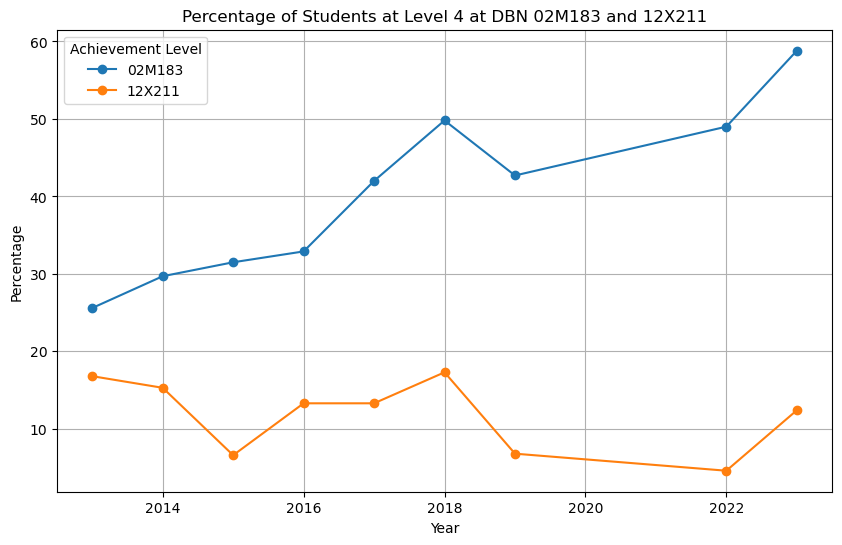

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(len_results.index, len_results['Pct Level 4'], marker='o', label='02M183')
plt.plot(len_results.index, hen_results['Pct Level 4'], marker='o', label='12X211')


plt.title('Percentage of Students at Level 4 at DBN 02M183 and 12X211')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

In [33]:
results[(results['Geographic Subdivision'] == 'Citywide') & 
        (results['Grade'] == 'All Grades') & 
        (results['Student Category'] == 'All Students')
        ].head(5)

,Report Category,Geographic Subdivision,School Name,Grade,Year,Student Category,Number Tested,Mean Scale Score,Num Level 1,Pct Level 1,Num Level 2,Pct Level 2,Num Level 3,Pct Level 3,Num Level 4,Pct Level 4,Num Level 3 and 4,Pct Level 3 and 4
6,Citywide,Citywide,NaN,All Grades,2023,All Students,313083,450,71620,22.9,79546,25.4,93084,29.7,68833,22.0,161917,51.7
13,Citywide,Citywide,NaN,All Grades,2022,All Students,322720,602,72571,22.5,92032,28.5,86216,26.7,71901,22.3,158117,49.0
20,Citywide,Citywide,NaN,All Grades,2019,All Students,392460,600,96610,24.6,109877,28.0,108579,27.7,77394,19.7,185973,47.4
27,Citywide,Citywide,NaN,All Grades,2018,All Students,396502,601,93331,23.5,118086,29.8,109742,27.7,75343,19.0,185085,46.7
34,Citywide,Citywide,NaN,All Grades,2017,All Students,397448,306,102571,25.8,133475,33.6,102148,25.7,59254,14.9,161402,40.6


In [34]:
citywide_results = results[
    (results['Geographic Subdivision'] == 'Citywide') & 
    (results['Grade'] == 'All Grades') & 
    (results['Student Category'] == 'All Students')
].copy()

citywide_results.set_index('Year', inplace=True)

In [35]:
columns_to_convert = [
    "Mean Scale Score",
    "Num Level 1",
    "Pct Level 1",
    "Num Level 2",
    "Pct Level 2",
    "Num Level 3",
    "Pct Level 3",
    "Num Level 4",
    "Pct Level 4",
    "Num Level 3 and 4",
    "Pct Level 3 and 4"
]

citywide_results[columns_to_convert] = citywide_results[columns_to_convert].apply(pd.to_numeric, errors='coerce')

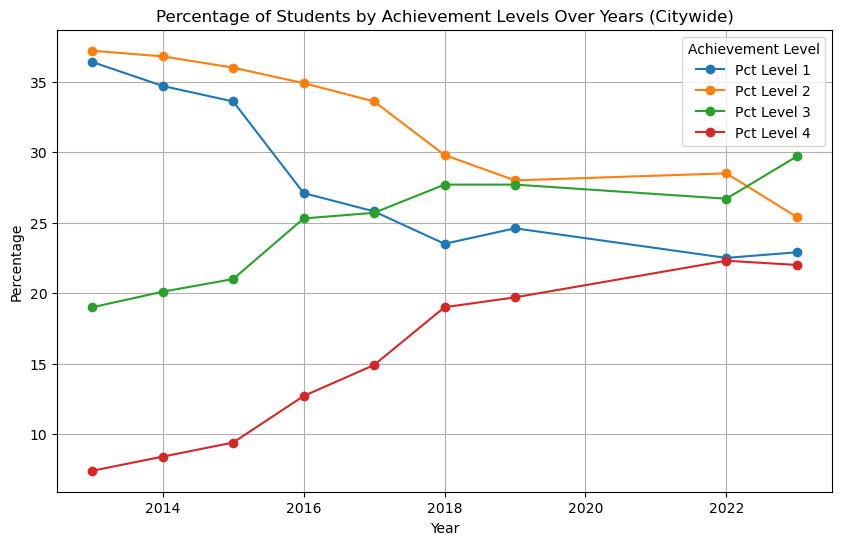

In [40]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(citywide_results.index, citywide_results['Pct Level 1'], marker='o', label='Pct Level 1')
plt.plot(citywide_results.index, citywide_results['Pct Level 2'], marker='o', label='Pct Level 2')
plt.plot(citywide_results.index, citywide_results['Pct Level 3'], marker='o', label='Pct Level 3')
plt.plot(citywide_results.index, citywide_results['Pct Level 4'], marker='o', label='Pct Level 4')

plt.title('Percentage of Students by Achievement Levels Over Years (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend(title='Achievement Level')
plt.grid(True)

plt.show()

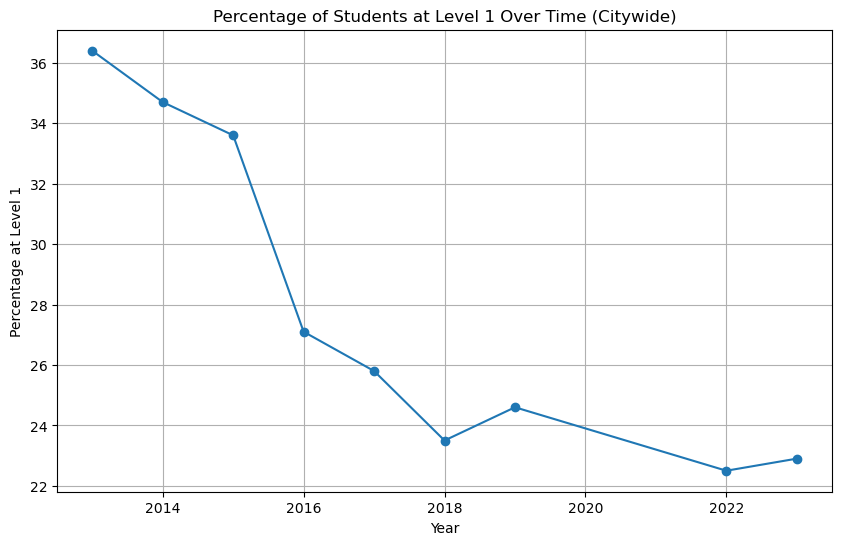

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(citywide_results.index, citywide_results['Pct Level 1'], marker='o', linestyle='-')
plt.title('Percentage of Students at Level 1 Over Time (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage at Level 1')
plt.grid(True)
plt.show()

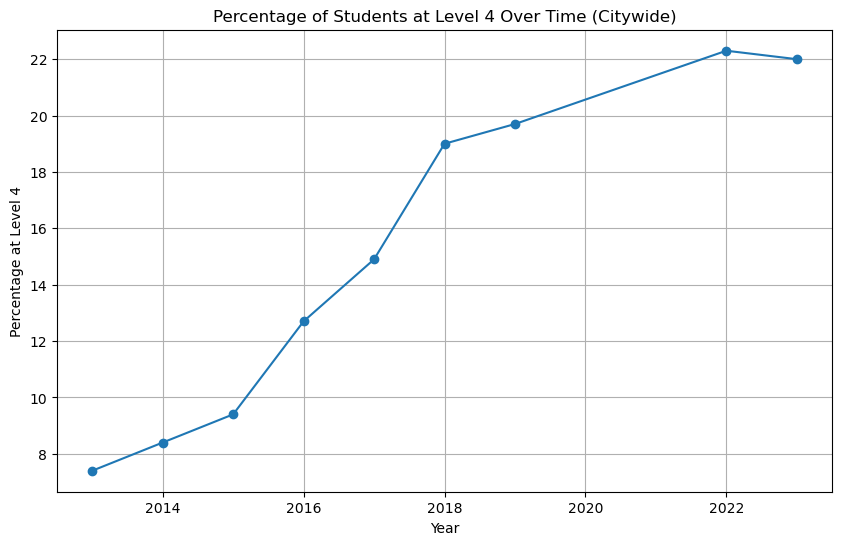

In [38]:
plt.figure(figsize=(10, 6))
plt.plot(citywide_results.index, citywide_results['Pct Level 4'], marker='o', linestyle='-')
plt.title('Percentage of Students at Level 4 Over Time (Citywide)')
plt.xlabel('Year')
plt.ylabel('Percentage at Level 4')
plt.grid(True)
plt.show()